# Build average GM velocity

In [1]:
# Ignore warnings
import os
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

In [2]:
import glob

In [3]:
# Load numpy for numbers!
import numpy as np

# Load pandas for DataFrame manipulations
import pandas as pd

In [4]:
import xarray as xr

In [5]:
import datetime

In [6]:
import matplotlib as plt

In [7]:
paths = glob.glob("/g/data/p73/archive/CMIP6/ACCESS-ESM1-5/HI-05/history/ocn/ocean_month.nc-199*")
paths

['/g/data/p73/archive/CMIP6/ACCESS-ESM1-5/HI-05/history/ocn/ocean_month.nc-19991231',
 '/g/data/p73/archive/CMIP6/ACCESS-ESM1-5/HI-05/history/ocn/ocean_month.nc-19911231',
 '/g/data/p73/archive/CMIP6/ACCESS-ESM1-5/HI-05/history/ocn/ocean_month.nc-19931231',
 '/g/data/p73/archive/CMIP6/ACCESS-ESM1-5/HI-05/history/ocn/ocean_month.nc-19901231',
 '/g/data/p73/archive/CMIP6/ACCESS-ESM1-5/HI-05/history/ocn/ocean_month.nc-19961231',
 '/g/data/p73/archive/CMIP6/ACCESS-ESM1-5/HI-05/history/ocn/ocean_month.nc-19941231',
 '/g/data/p73/archive/CMIP6/ACCESS-ESM1-5/HI-05/history/ocn/ocean_month.nc-19951231',
 '/g/data/p73/archive/CMIP6/ACCESS-ESM1-5/HI-05/history/ocn/ocean_month.nc-19971231',
 '/g/data/p73/archive/CMIP6/ACCESS-ESM1-5/HI-05/history/ocn/ocean_month.nc-19981231',
 '/g/data/p73/archive/CMIP6/ACCESS-ESM1-5/HI-05/history/ocn/ocean_month.nc-19921231']

In [8]:
ds = xr.open_mfdataset(paths)

In [9]:
ds

<xarray.Dataset> Size: 175GB
Dimensions:                          (time: 120, yt_ocean: 300, xt_ocean: 360,
                                      yu_ocean: 300, xu_ocean: 360,
                                      st_ocean: 50, sw_ocean: 50, potrho: 80,
                                      grid_yt_ocean: 300, grid_xu_ocean: 360,
                                      grid_yu_ocean: 300, grid_xt_ocean: 360,
                                      nv: 2, st_edges_ocean: 51,
                                      sw_edges_ocean: 51, potrho_edges: 81)
Coordinates: (12/20)
  * xt_ocean                         (xt_ocean) float64 3kB -279.5 ... 79.5
  * yt_ocean                         (yt_ocean) float64 2kB -77.88 ... 89.77
  * time                             (time) datetime64[ns] 960B 1990-01-14T12...
  * nv                               (nv) float64 16B 1.0 2.0
  * xu_ocean                         (xu_ocean) float64 3kB -279.0 ... 80.0
  * yu_ocean                         (yu_ocean) float64 2kB -77.75 ... 90.0
    ...                               ...
  * grid_xt_ocean                    (grid_xt_ocean) float64 3kB -279.5 ... 79.5
  * grid_yu_ocean                    (grid_yu_ocean) float64 2kB -77.75 ... 90.0
    geolat_c                         (yu_ocean, xu_ocean) float32 432kB dask.array<chunksize=(300, 360), meta=np.ndarray>
    geolon_c                         (yu_ocean, xu_ocean) float32 432kB dask.array<chunksize=(300, 360), meta=np.ndarray>
    geolat_t                         (yt_ocean, xt_ocean) float32 432kB dask.array<chunksize=(300, 360), meta=np.ndarray>
    geolon_t                         (yt_ocean, xt_ocean) float32 432kB dask.array<chunksize=(300, 360), meta=np.ndarray>
Data variables: (12/206)
    ht                               (time, yt_ocean, xt_ocean) float32 52MB dask.array<chunksize=(12, 300, 360), meta=np.ndarray>
    hu                               (time, yu_ocean, xu_ocean) float32 52MB dask.array<chunksize=(12, 300, 360), meta=np.ndarray>
    area_t                           (time, yt_ocean, xt_ocean) float32 52MB dask.array<chunksize=(12, 300, 360), meta=np.ndarray>
    area_u                           (time, yu_ocean, xu_ocean) float32 52MB dask.array<chunksize=(12, 300, 360), meta=np.ndarray>
    kmt                              (time, yt_ocean, xt_ocean) float32 52MB dask.array<chunksize=(12, 300, 360), meta=np.ndarray>
    kmu                              (time, yu_ocean, xu_ocean) float32 52MB dask.array<chunksize=(12, 300, 360), meta=np.ndarray>
    ...                               ...
    wind_power_u                     (time, yu_ocean, xu_ocean) float32 52MB dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
    wind_power_v                     (time, yu_ocean, xu_ocean) float32 52MB dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
    average_T1                       (time) datetime64[ns] 960B dask.array<chunksize=(12,), meta=np.ndarray>
    average_T2                       (time) datetime64[ns] 960B dask.array<chunksize=(12,), meta=np.ndarray>
    average_DT                       (time) timedelta64[ns] 960B dask.array<chunksize=(12,), meta=np.ndarray>
    time_bounds                      (time, nv) timedelta64[ns] 2kB dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    filename:   ocean_month.nc
    title:      ACCESS-ESM_CMIP6
    grid_type:  regular
    grid_tile:  N/A

In [10]:
# Take the time average of the monthly data
tx_trans_gm = ds.tx_trans_gm.weighted(ds.time.dt.days_in_month).mean(dim="time")
tx_trans_gm

<xarray.DataArray 'tx_trans_gm' (st_ocean: 50, yt_ocean: 300, xu_ocean: 360)> Size: 43MB
dask.array<truediv, shape=(50, 300, 360), dtype=float64, chunksize=(25, 150, 180), chunktype=numpy.ndarray>
Coordinates:
  * yt_ocean  (yt_ocean) float64 2kB -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * xu_ocean  (xu_ocean) float64 3kB -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * st_ocean  (st_ocean) float64 400B 5.0 15.0 25.0 ... 5.499e+03 5.831e+03

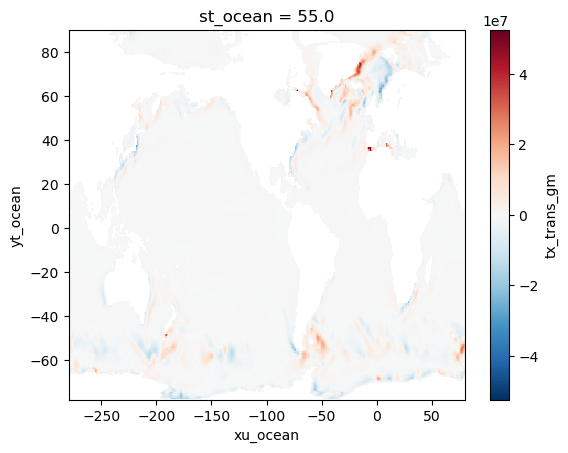

In [11]:
tx_trans_gm.sel(st_ocean=50, method='nearest').plot()

In [12]:
# Take the time average of the monthly data
ty_trans_gm = ds.ty_trans_gm.weighted(ds.time.dt.days_in_month).mean(dim="time")
ty_trans_gm

<xarray.DataArray 'ty_trans_gm' (st_ocean: 50, yu_ocean: 300, xt_ocean: 360)> Size: 43MB
dask.array<truediv, shape=(50, 300, 360), dtype=float64, chunksize=(25, 150, 180), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 3kB -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yu_ocean  (yu_ocean) float64 2kB -77.75 -77.51 -77.26 ... 89.1 89.55 90.0
  * st_ocean  (st_ocean) float64 400B 5.0 15.0 25.0 ... 5.499e+03 5.831e+03

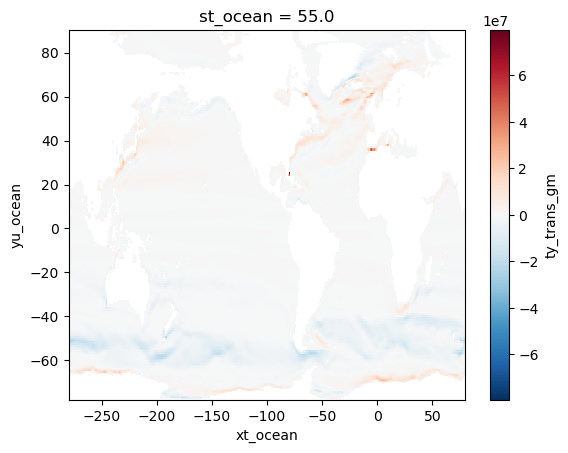

In [13]:
ty_trans_gm.sel(st_ocean=50, method='nearest').plot()

In [14]:
outputdir = "/scratch/xv83/TMIP/data/ACCESS-ESM1-5/historical/r1i1p1f1/Jan1990-Dec1999"
tx_trans_gm.to_netcdf(f'{outputdir}/tx_trans_gm.nc', compute=True)
ty_trans_gm.to_netcdf(f'{outputdir}/ty_trans_gm.nc', compute=True)